# Panelanalyse der Flüchtlingstöme nach Ländern

Da unsere Daten eine Panelstruktur aufweisen, liegt der Flüchtlingsanteil pro 1.000 Einwohner für mehrere Länder über mehrere Jahre vor, getrennt nach Herkunfts und Zielländern. Aus diesem Grund haben wir uns für die Durchführung einer Panelanalyse entschieden.

Eine Panelanalyse ermöglicht es, sowohl zeitliche Entwicklungen als auch Unterschiede zwischen Ländern zu berücksichtigen. Insbesondere erlaubt sie, länderspezifische Eigenschaften zu kontrollieren, die sich über die Zeit nicht oder nur sehr langsam verändern, wie etwa institutionelle Rahmenbedingungen, geografische Lage oder grundlegende Unterschiede in der Asylpolitik.

Durch die Verwendung eines Fixed Effects Panelmodells werden diese zeitlich konstanten Länderunterschiede herausgerechnet. Dadurch konzentriert sich die Analyse auf die Veränderung des Flüchtlingsanteils innerhalb eines Landes über die Zeit, anstatt Unterschiede im Niveau zwischen Ländern zu vergleichen.

Das Panelmodell eignet sich somit besonders, um zu untersuchen, ob sich die Flüchtlingsaufnahme oder Abwanderung innerhalb einzelner Länder im Zeitverlauf systematisch verändert. Die Analyse dient dabei einer deskriptiven Betrachtung langfristiger Trends und nicht der kausalen Erklärung der beobachteten Entwicklungen.

# Import Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
def fixed_effects_all_countries(df,title):
   
    results = []
  
    # Analyse wird für jedes Land einzeln durchgeführt
    for country in df["country"].unique():

        sub = df[df["country"] == country].copy().sort_values("Year")

        y = sub["share_per_1000"]
        x = sub["Year"]

        
        # Demeaning Schritt
        y_dm = y - y.mean()
        x_dm = x - x.mean()

        # OLS regression auf den demeaned Daten und auslesen der wichtgsten Kennzahlen
        model = sm.OLS(y_dm, x_dm).fit()
        beta = model.params.iloc[0]
        stderr = model.bse.iloc[0]
        t = model.tvalues.iloc[0]
        p = model.pvalues.iloc[0]
        r2 = model.rsquared

       # Resultate in Data Frame speichern
        results.append({
            "country": country,
            "beta": beta,
            "stderr": stderr,
            "t": t,
            "p": p,
            "r2": r2
        })
    results_df = pd.DataFrame(results).dropna()

    # auswahl statistisch signifikanter und relevanten Länder (für Plot)
    sig_df = results_df[
        (results_df["p"] < 0.05) &
        ((results_df["beta"] > 0.5) | (results_df["beta"] < -0.5))
    ].copy()

   
    sig_df = sig_df.sort_values("beta")

    
    # plot
    plt.figure(figsize=(12, 14))

    colors = ["red" if b < 0 else "green" for b in sig_df["beta"]]

    plt.barh(
        sig_df["country"],
        sig_df["beta"],
        color=colors
    )

    plt.axvline(0, color="black", linewidth=1)

    plt.title(
        f"Fixed Effects (Demeaning) Regression: Zeitlicher Trend der {title} pro Land"
    )

    plt.xlabel("β Koeffizient")
    plt.ylabel("Aufnahmeländer")

    plt.tight_layout()
    plt.show()

    return results_df

c:\Users\paulk\My_Drive\Statistik_project_github\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\paulk\My_Drive\Statistik_project_github\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\paulk\My_Drive\Statistik_project_github\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\paulk\My_Drive\Statistik_project_github\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


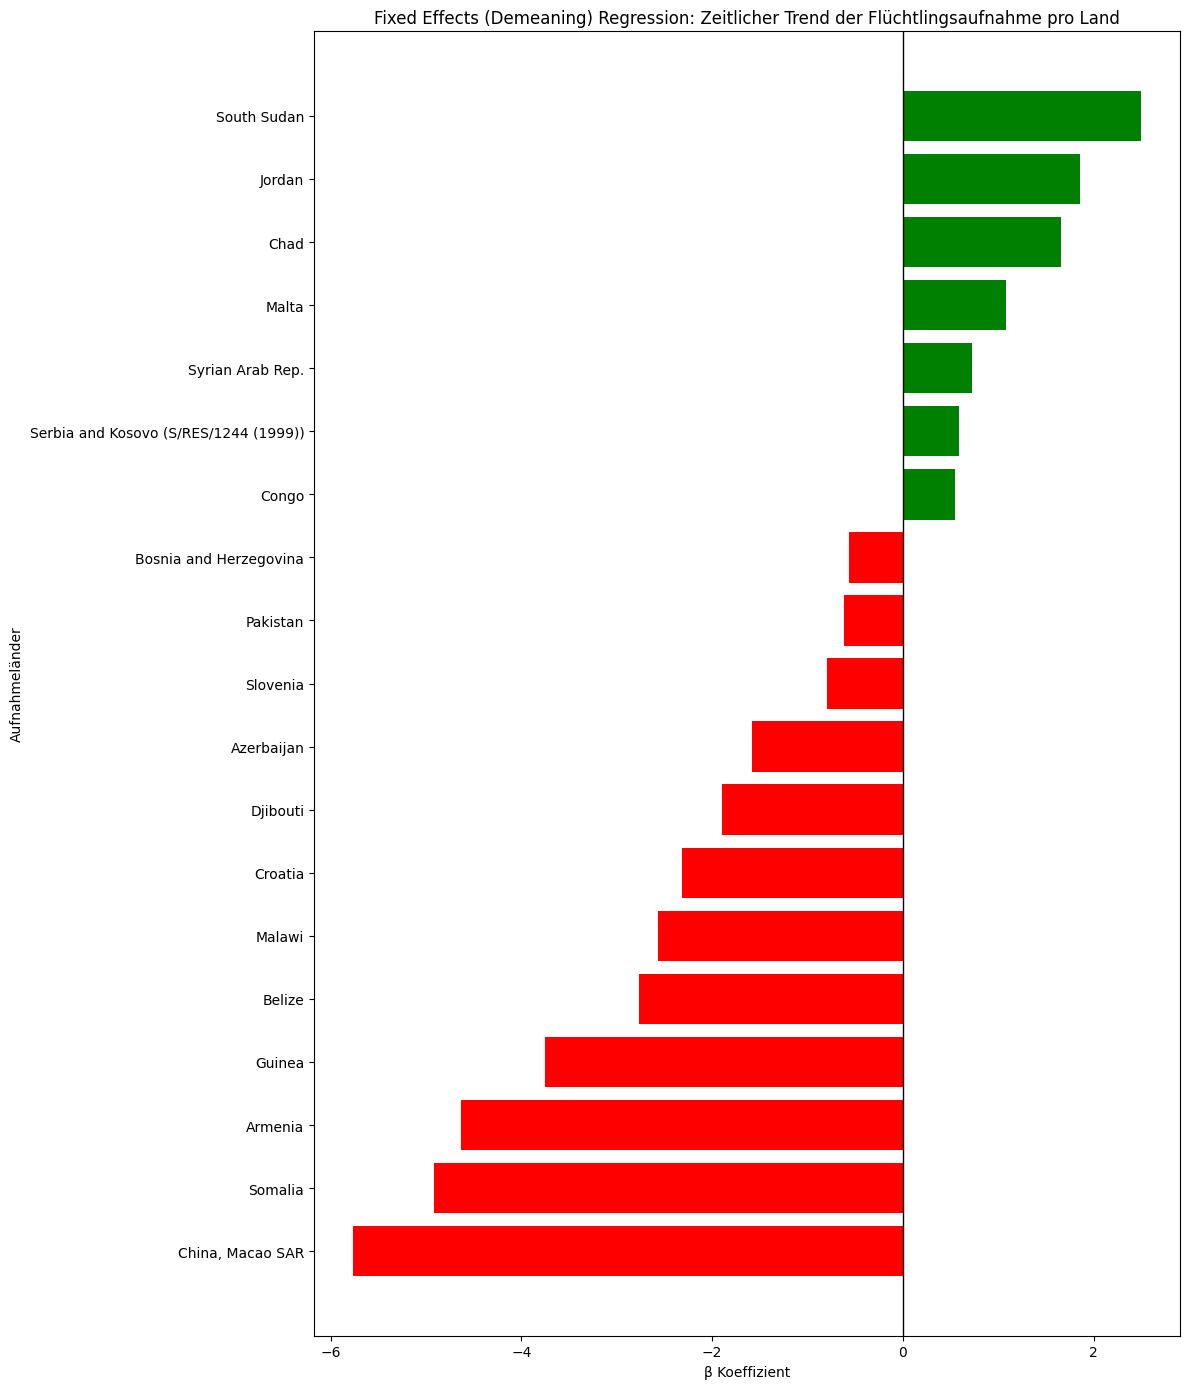

                                country      beta    stderr         t  \
0                           Afghanistan  0.073992  0.058245  1.270349   
1                               Albania -0.066915  0.037650 -1.777277   
2                               Algeria -0.049435  0.027840 -1.775695   
3                                Angola -0.341575  0.063212 -5.403639   
4                   Antigua and Barbuda  0.010758  0.015127  0.711152   
..                                  ...       ...       ...       ...   
182                             Vanuatu -0.001066  0.000653 -1.632662   
183  Venezuela (Bolivarian Republic of)  0.115444  0.024180  4.774454   
184                            Viet Nam -0.029498  0.004840 -6.094657   
185                              Zambia  0.061966  0.067066  0.923954   
186                            Zimbabwe -0.303654  0.090539 -3.353859   

                p        r2  
0    2.161380e-01  0.063005  
1    8.819960e-02  0.116306  
2    8.302923e-02  0.069831  
3  

In [3]:
df = pd.read_csv("output_csv_files/Destination_refugees_per_capita.csv")
results = fixed_effects_all_countries(df,title="Flüchtlingsaufnahme")
print(results)

## Interpretation Panelanalyse Flüchtlingsaufnahme pro Land

### Grüner Balken

- Ein positiver Beta Koeffizient bedeutet, dass der Flüchtlingsanteil pro 1.000 Einwohner innerhalb dieses Landes im Zeitverlauf zugenommen hat.
- Ein Beta Koeffizient von 4 bedeutet, dass der Flüchtlingsanteil pro 1.000 Einwohner im betrachteten Zeitraum im Durchschnitt um etwa 4 Personen pro Jahr gestiegen ist.

### Roter Balken

- Ein negativer Beta Koeffizient bedeutet, dass der Flüchtlingsanteil pro 1.000 Einwohner innerhalb dieses Landes im Zeitverlauf abgenommen hat.
- Ein Beta Koeffizient von -4 bedeutet, dass der Flüchtlingsanteil pro 1.000 Einwohner im betrachteten Zeitraum im Durchschnitt um etwa 4 Personen pro Jahr gesunken ist.

### South Sudan

- Weist den grössten positiven Beta Koeffizienten auf.
- Dies bedeutet, dass South Sudan im betrachteten Zeitraum den stärksten durchschnittlichen Anstieg der Flüchtlingsaufnahme relativ zur eigenen Bevölkerung verzeichnet hat.

### China Macao SAR

- Weist den stärksten negativen Beta Koeffizienten auf.
- Dies deutet darauf hin, dass der Flüchtlingsanteil pro 1.000 Einwohner dort im Zeitverlauf am stärksten zurückgegangen ist.

c:\Users\paulk\My_Drive\Statistik_project_github\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


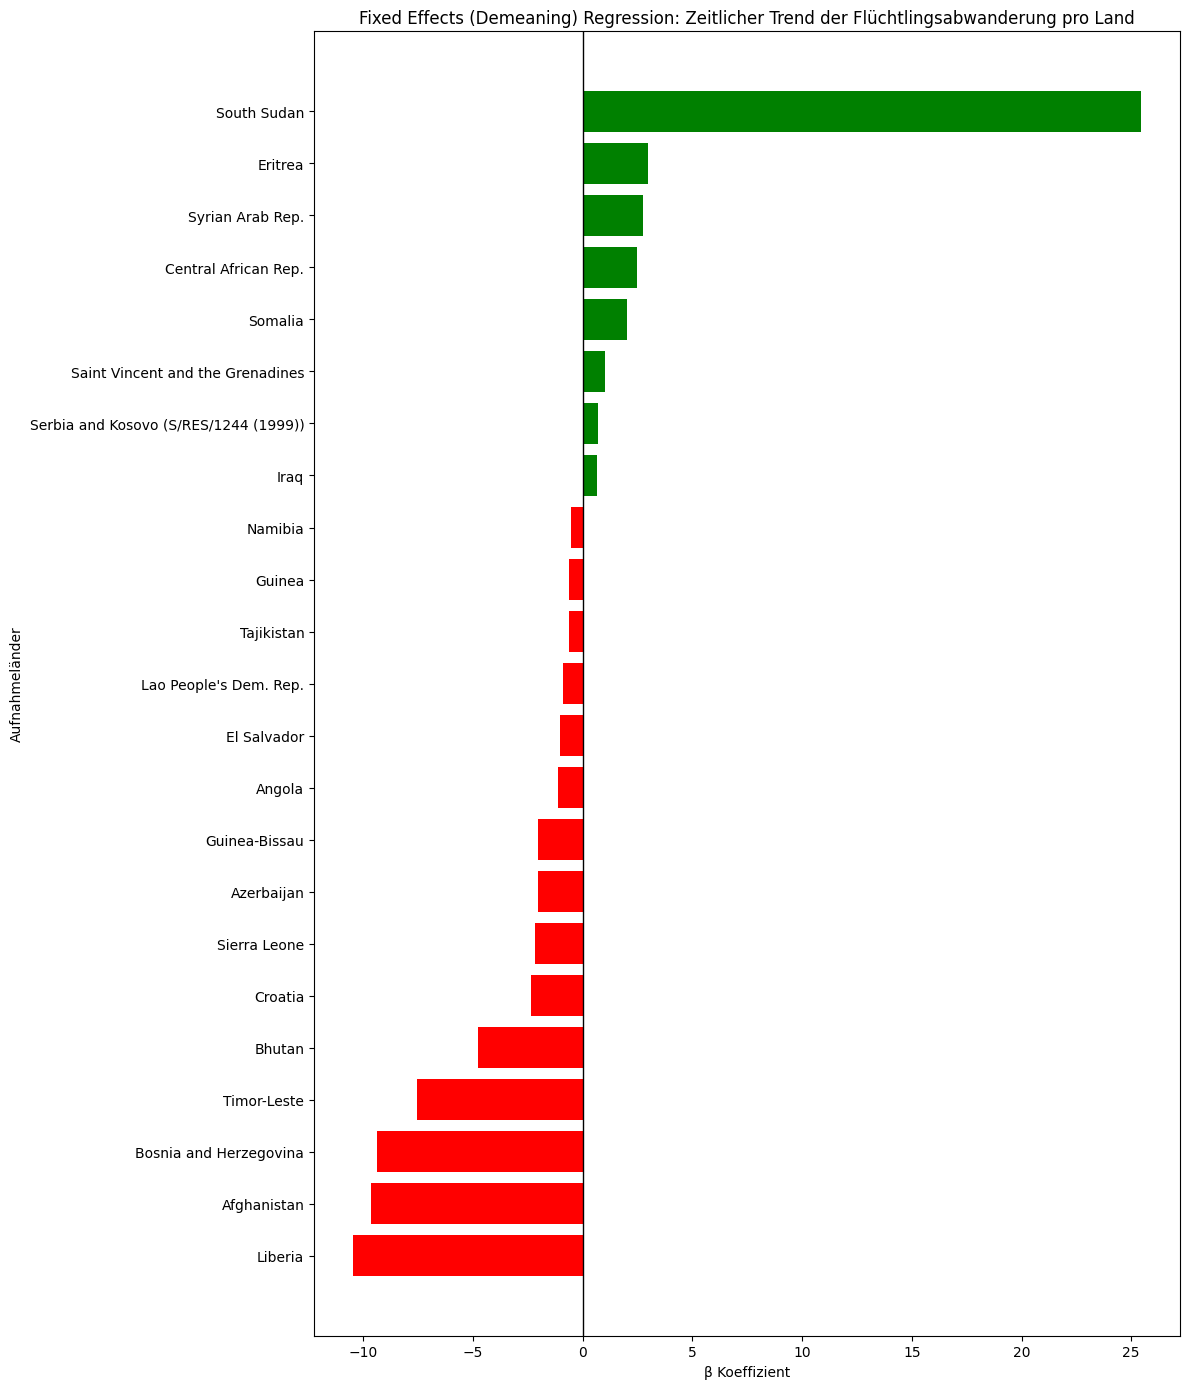

                                country      beta    stderr         t  \
0                           Afghanistan -9.672327  1.703530 -5.677815   
1                               Albania  0.152668  0.021818  6.997368   
2                               Algeria  0.010449  0.002163  4.831088   
4                               Andorra  0.001887  0.001641  1.149834   
5                                Angola -1.132979  0.125444 -9.031777   
..                                  ...       ...       ...       ...   
195                             Vanuatu -0.000259  0.000256 -1.012937   
196  Venezuela (Bolivarian Republic of)  0.031985  0.006517  4.908144   
197                            Viet Nam  0.061879  0.021518  2.875757   
198                              Zambia -0.027581  0.006864 -4.018543   
199                            Zimbabwe -0.109132  0.077039 -1.416577   

                p        r2  
0    1.715175e-06  0.465608  
1    5.494973e-09  0.489812  
2    2.514645e-05  0.393321  
4  

In [4]:
df = pd.read_csv("output_csv_files/Origin_refugees_per_capita.csv")
results = fixed_effects_all_countries(df,title = "Flüchtlingsabwanderung")
print(results)

## Interpretation Panelanalyse Flüchtlingsabwanderung pro Land

### Grüner Balken

- Ein positiver Beta Koeffizient bedeutet, dass der Flüchtlingsanteil pro 1.000 Einwohner, also der Anteil der Bevölkerung, der das Land verlassen hat, innerhalb dieses Landes im Zeitverlauf zugenommen hat.


### Roter Balken

- Ein negativer Beta Koeffizient bedeutet, dass der Flüchtlingsanteil pro 1.000 Einwohner innerhalb dieses Landes im Zeitverlauf abgenommen hat.
- Die relative Abwanderung ist über die Zeit zurückgegangen.

### South Sudan

- Weist den mit Abstand grössten positiven Beta Koeffizienten auf.
- Dies bedeutet, dass sich die Flüchtlingsabwanderung aus South Sudan im betrachteten Zeitraum besonders stark verstärkt hat, gemessen relativ zur eigenen Bevölkerung.

### Liberia und Afghanistan

- Zeigen die stärksten negativen Beta Koeffizienten.
- Über den zeitlichen Verlauf ist dort der Anteil der Bevölkerung, der geflohen ist, relativ zurückgegangen, was auf frühere starke Fluchtbewegungen mit anschließender Abschwächung hindeutet.